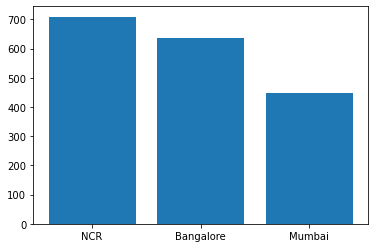

The place having maximum chances to get funding is  NCR 
number of fundings are  709


In [1]:
# at first we will import all the libararies that are required during the code 
import csv
import numpy as np
import matplotlib.pyplot as plt

#now we will open the csv file , here i am reading it with csv libarary however same could be done using pandas and the encoding used is utf-8
with open('startup_funding.csv', encoding='utf8') as file_obj:
    #now we will read the entire data from the file using DictReader function of csv libarary
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    city=[]
    
    #after reading a file  for better and faster access we will convert cities to numpy array 
    for row in file_data:
        city.append(row['CityLocation'])
    ncity=np.array(city)
    
    #we will now remove all the blank entries from the list 
    ncity=ncity[ncity != '']
    
    #now we will check out for the case sensitivity and other spelling issues and correct them so that we can further process on list 
    for i in range(len(ncity)):
        if 'bangalore' in ncity[i]:
            ncity[i]='Bangalore'
        if ncity[i]=='Delhi':
            ncity[i]='New Delhi'
    
    # we will now filter out only the indian cities from lists in case of multiple entries by considering only the first and ignoring others 
    for i in range(len(ncity)) :
        ncity[i]=ncity[i].split('/')[0].strip()
  

    # convert the list of arrays to a dictionary and 
    d=dict()
    for i in ncity:
        d[i]=d.get(i,0)+1
    
    
    y=list()
    x=list()
    # since we can only get funding from NCR , MUMBAI and Bangalore so we copy those values to new dictionary and combine values of New Delhi Noida and Gurgaon 
    d2=dict()
    d2["NCR"]=d["New Delhi"] + d["Gurgaon"] + d["Noida"]
    d2["Bangalore"]=d["Bangalore"]
    d2["Mumbai"]=d["Mumbai"]
    
    #now we will convert them to two arrays for plotting 
    for i in d2.keys():
        x.append(i)
        y.append(d2[i])
    # plot and display of bar graph    
    plt.bar(x,y)
    plt.show()
    
    # now we will sort and  reverse the values to get maximum values  
    k= sorted(d2.items(),key= lambda k:k[1],reverse=True)
    k=k[:1]
    for i in k: 
        print("The place having maximum chances to get funding is ",i[0],"\nnumber of fundings are ",i[1])
        
